<a href="https://colab.research.google.com/github/peterlhn/Google-Colab/blob/master/REST_API_HTTP_Request.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**The Cloud Function looks like this:**
```
from flask import jsonify      # To return JSON format for requests

def hello_world(request):
    request_json = request.get_json()
    if request.args and 'message' in request.args:
        msg = request.args.get('message')
        return jsonify(msg)
    elif request_json and 'message' in request_json:
        msg = request_json['message']
        return jsonify(msg)
    else:
        return f'Hello World!'

```



In [ ]:
import requests

#**GET Method**
- GET is used to request data from a specified resource.
- GET is one of the most common HTTP methods.

In [ ]:
# Also able to call directly via HTTP URL
# https://us-central1-ppp-personal-project.cloudfunctions.net/testing_API?message=kakakakaka

url = 'https://us-central1-ppp-personal-project.cloudfunctions.net/testing_API'
param = {"message":"kakakakaka!"}

###**Request via URL and storage response - HELLO WORLD**

In [ ]:
response = requests.get(url, param)
print(response)

<Response [200]>


In [ ]:
print(response.json())

kakakakaka!


###**Google MAP API - Geocoding**

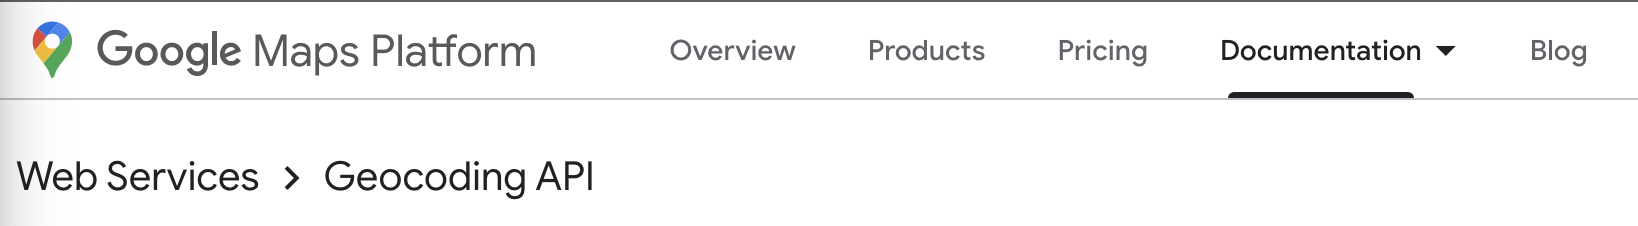

[
Geocoding API](https://developers.google.com/maps/documentation/geocoding/overview)

In [ ]:
import requests

url = 'https://maps.googleapis.com/maps/api/geocode/json'
param = {"address":"Toronto",
         "key": "PUT KEY HERE"}


In [ ]:
response = requests.get(url, param)
print(response)

<Response [200]>


In [ ]:
# Extract the JSON format of return from response
geoinfo  = response.json()

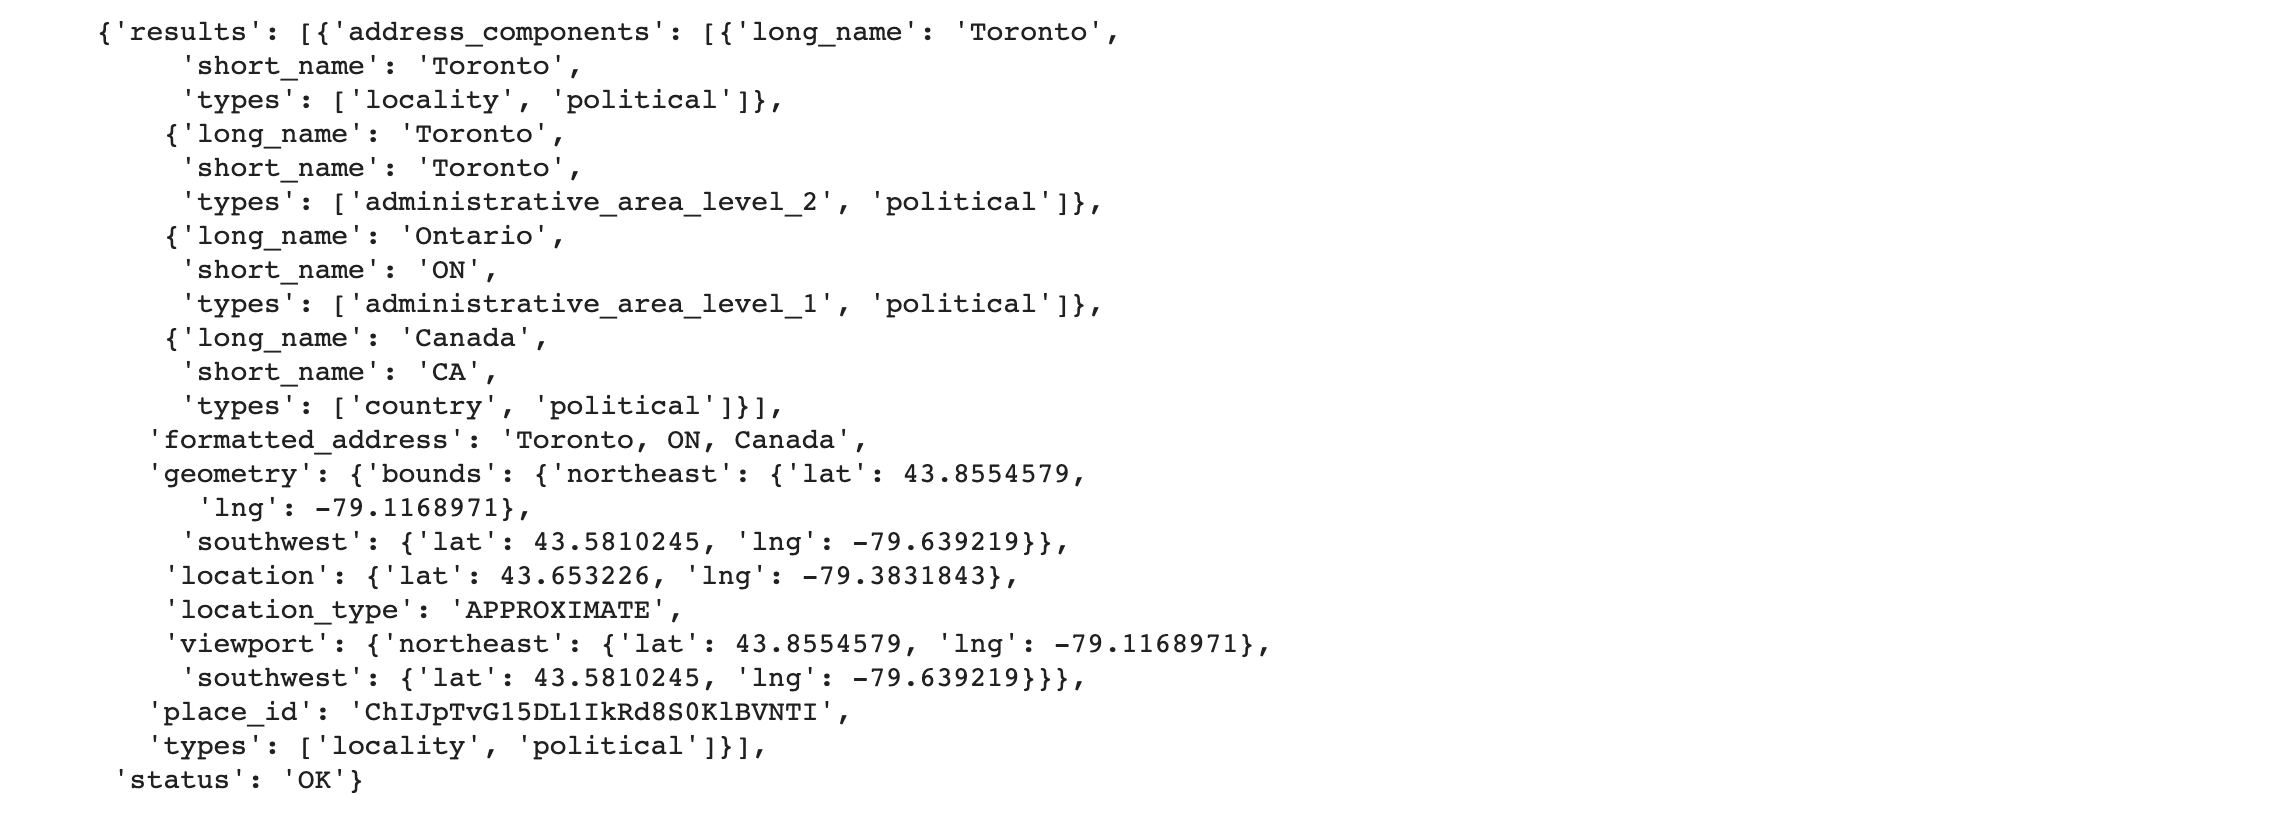

In [ ]:
# Extract the address_components from JSON result
address_components = geoinfo["results"][0]["address_components"]

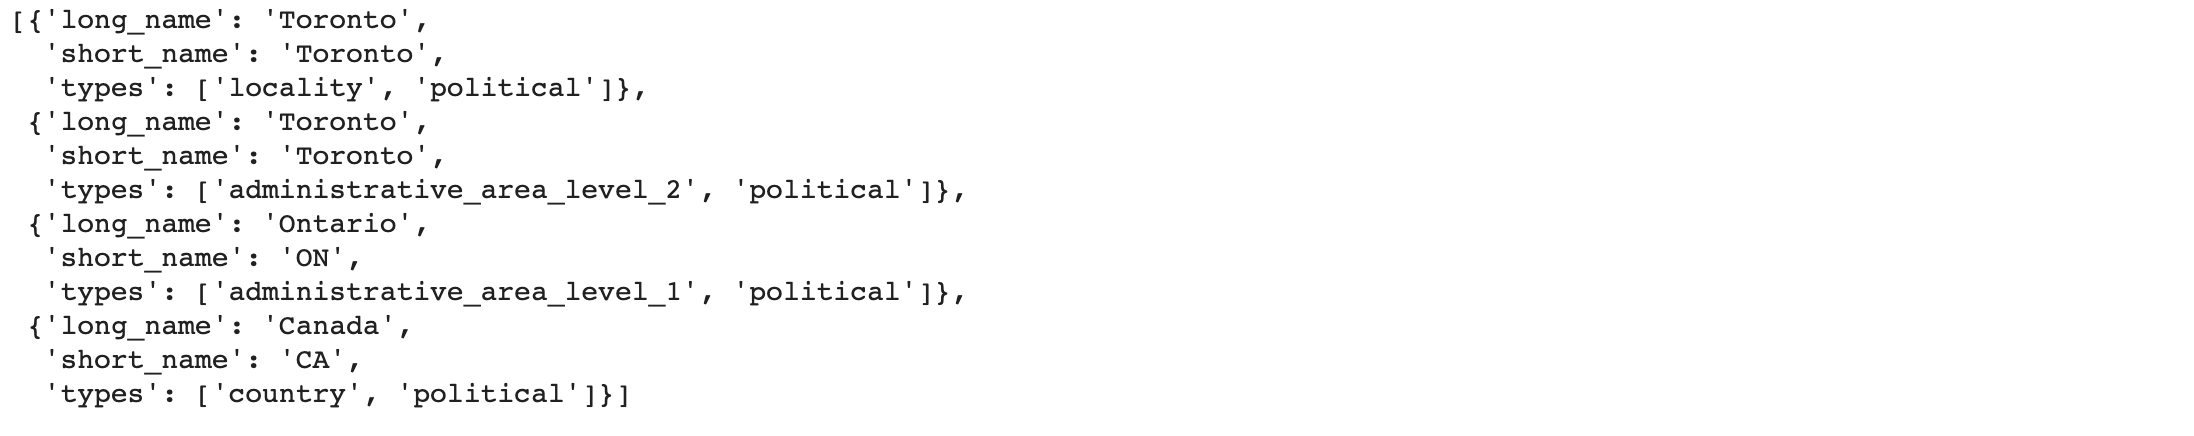

In [ ]:
for i in address_components:
  print(i['long_name'], " - ", i['types'][0])

Toronto  -  locality
Toronto  -  administrative_area_level_2
Ontario  -  administrative_area_level_1
Canada  -  country


###**HK Weather Open API**

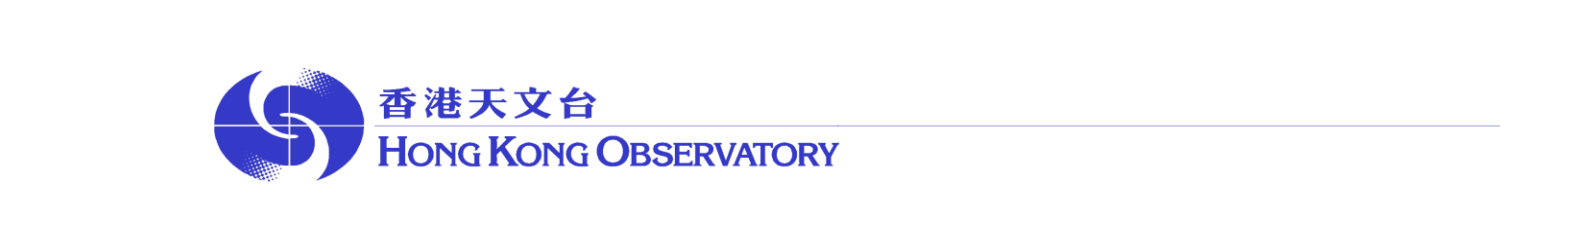

[Hong Kong Observatory
Open Data API Documentation](https://www.hko.gov.hk/en/weatherAPI/doc/files/HKO_Open_Data_API_Documentation.pdf)

**1. Weather Information API**
- 9-day Weather Forecast
- Current Weather Report
- Local Weather Forecast
- Weather Warning Information
- Weather Warning Summary
- Special Weather Tips

**Local Weather Forecast**

In [ ]:
import requests

# Local Weather Forecast
url = 'https://data.weather.gov.hk/weatherAPI/opendata/weather.php'
param = {"dataType":"flw",
         "lang": "en"}

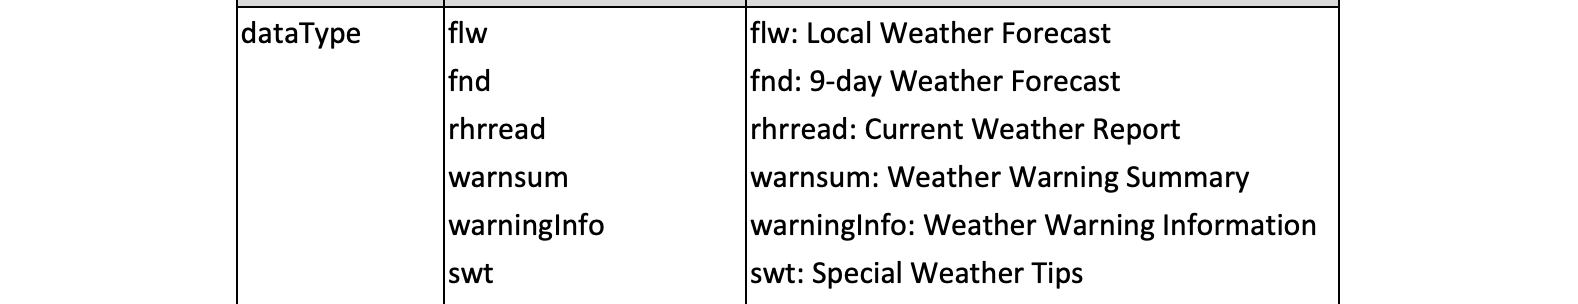

In [ ]:
response = requests.get(url, param)
local_weather_forecast  = response.json()

In [ ]:
local_weather_forecast

{'fireDangerWarning': '',
 'forecastDesc': 'It will be cooler. Cloudy to overcast with one or two rain patches. Moderate to fresh northerly winds, occasionally strong offshore.',
 'forecastPeriod': 'Weather forecast for today',
 'generalSituation': 'The northeast monsoon is bringing cooler weather to the coast of Guangdong. Locally, the minimum temperature recorded at the Observatory this morning was 18.2 degrees, the lowest so far this autumn.',
 'outlook': 'Still cooler tomorrow morning. The weather will improve early next week with temperatures rising during the day.',
 'tcInfo': '',
 'updateTime': '2021-10-22T10:45:00+08:00'}

**9-day Weather Forecast**

In [ ]:
# 9-day Weather Forecast
url = 'https://data.weather.gov.hk/weatherAPI/opendata/weather.php'
param = {"dataType":"fnd",
         "lang": "en"}

In [ ]:
response = requests.get(url, param)
nine_d_forecast  = response.json()

In [ ]:
nine_d_forecast['weatherForecast'][0]

{'ForecastIcon': 62,
 'PSR': 'Low',
 'forecastDate': '20211022',
 'forecastMaxrh': {'unit': 'percent', 'value': 90},
 'forecastMaxtemp': {'unit': 'C', 'value': 20},
 'forecastMinrh': {'unit': 'percent', 'value': 65},
 'forecastMintemp': {'unit': 'C', 'value': 18},
 'forecastWeather': 'It will be appreciably cooler. Cloudy to overcast with one or two rain patches.',
 'forecastWind': 'North force 4 to 5, occasionally force 6 offshore.',
 'week': 'Friday'}

#**POST Method**
- POST is used to send data to a server to create/update a resource.
- The data sent to the server with POST is stored in the request body of the HTTP request: